In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.svm import SVR
from sklearn import svm
import seaborn as sns

In [2]:
data = pd.read_csv('bitcoin_dataset.csv')

In [3]:
data.fillna(method = 'pad',  inplace=True)

In [4]:
data.btc_n_orphaned_blocks =data.btc_n_orphaned_blocks.astype('category')

In [5]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.393579,0.999783,0.868841,0.674818,0.544033,0.544125,0.281177,0.920876,0.915678,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.393579,1.000000,0.385584,0.286219,0.779819,0.852794,0.832776,0.675648,0.489650,0.500957,...,-0.078993,0.373885,0.821856,0.834239,0.783986,0.815956,0.801724,0.293595,0.215718,0.388928
btc_market_cap,0.999783,0.385584,1.000000,0.869353,0.673091,0.541310,0.541702,0.277871,0.922073,0.916805,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868841,0.286219,0.869353,1.000000,0.521387,0.416131,0.430445,0.218843,0.758364,0.753544,...,-0.009400,0.689996,0.539453,0.453805,0.525605,0.442148,0.449879,0.097334,0.056055,0.896043
btc_blocks_size,0.674818,0.779819,0.673091,0.521387,1.000000,0.956191,0.946993,0.513376,0.826141,0.841039,...,-0.029983,0.446105,0.966840,0.950442,0.999785,0.952262,0.961439,0.252480,0.154697,0.672629
btc_avg_block_size,0.544033,0.852794,0.541310,0.416131,0.956191,1.000000,0.977887,0.558875,0.687581,0.705380,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_transactions_per_block,0.544125,0.832776,0.541702,0.430445,0.946993,0.977887,1.000000,0.563395,0.670598,0.692977,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.281177,0.675648,0.277871,0.218843,0.513376,0.558875,0.563395,1.000000,0.354346,0.378267,...,-0.055215,0.183495,0.518345,0.549277,0.518870,0.514467,0.539214,0.307848,0.215433,0.284652
btc_hash_rate,0.920876,0.489650,0.922073,0.758364,0.826141,0.687581,0.670598,0.354346,1.000000,0.990243,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864
btc_difficulty,0.915678,0.500957,0.916805,0.753544,0.841039,0.705380,0.692977,0.378267,0.990243,1.000000,...,-0.016267,0.684310,0.774924,0.704784,0.844351,0.698373,0.721406,0.164141,0.082845,0.879466


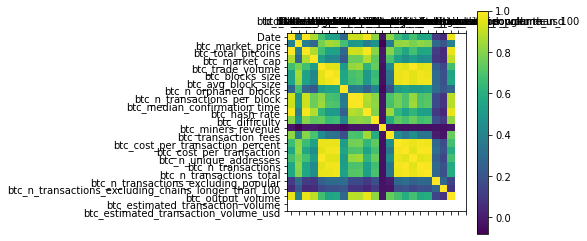

In [6]:

plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

In [7]:
data_new = data.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)


scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(data_new)
train_d2 = pd.DataFrame(train_d1,columns=data_new.columns)

In [8]:
X = train_d2.iloc[:, 1:21]
y = train_d2.iloc[:, 0]

X = pd.DataFrame(X)
y = pd.DataFrame(y)

random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)



In [9]:
Model_Name=[]
Model_accu=[]

In [10]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    #print('Training_score: {}'.format(model.score(X_train,y_train)))
    
    y_prediction=model.predict(X_test)
    y_prediction=y_prediction.reshape(582,1)
    #print('Predictions are : {}'.format(y_prediction))
    #print('\n')
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    Model_Name.append('{}'.format(ml_model))
    Model_accu.append(r2_score)
    sns.distplot(y_test-y_prediction)

r2_score: 0.980109668668981
MSE :  0.00033019572775583127
MAE :  0.008807373865996787
RMSE :  0.018171288555185933


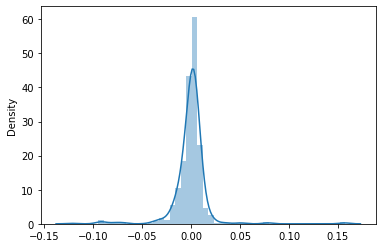

In [11]:
predict(LinearRegression() )

r2_score: 0.9891989446134665
MSE :  0.0001793063315303133
MAE :  0.0037639661597456617
RMSE :  0.013390531413290262


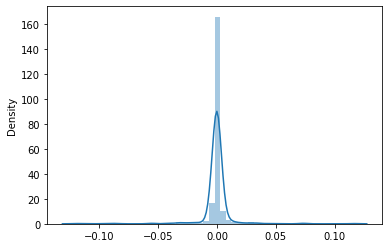

In [12]:
predict(KNeighborsRegressor())

r2_score: 0.977166638241325
MSE :  0.00037905243394613565
MAE :  0.008901534115066946
RMSE :  0.019469268962807405


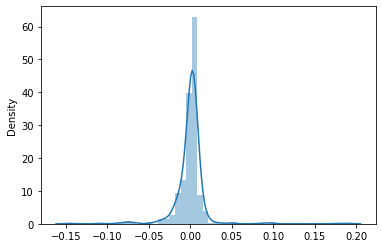

In [13]:
predict(Ridge())

r2_score: 0.9563448775254265
MSE :  0.0007247106494039087
MAE :  0.010962662126816665
RMSE :  0.026920450393778866


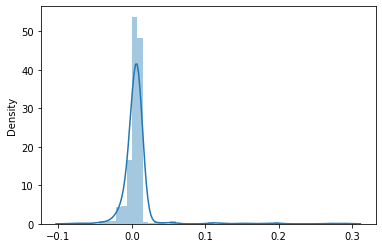

In [14]:
predict(SVR(kernel='rbf',C = 1, epsilon = 0.01, gamma = 0.01 ))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

df_X = X
df_y = y

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, df_y, random_state=0)

linreg = LinearRegression().fit(X_train_p, y_train_p)
accu=linreg.score(X_test_p,y_test_p)
Model_Name.append("LinearRegression poly features")
Model_accu.append(accu)
#print('(poly deg 2) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2) R-squared score (training): 1.000
(poly deg 2) R-squared score (test): 1.000



In [16]:
linreg = Ridge().fit(X_train_p, y_train_p)

#print('(poly deg 2 + ridge) linear model coeff (w):\n{}'.format(linreg.coef_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2 + ridge) R-squared score (training): 0.997
(poly deg 2 + ridge) R-squared score (test): 0.996


In [17]:
bitcoin = pd.read_csv('bitcoin_dataset.csv')

#imputing missing values with the previous value
bitcoin = bitcoin.fillna(method = 'pad')

#dropping the target variable
bitcoin = bitcoin.drop(['Date', 'btc_market_cap','btc_miners_revenue'], axis = 1,errors = 'ignore')

feature_names_bitcoin = [ 'btc_total_bitcoins','btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks', 'btc_n_transactions_per_block', 'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_cost_per_transaction', 'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd']
X_bitcoin = bitcoin[feature_names_bitcoin]
y_bitcoin = bitcoin['btc_market_price']

test = pd.read_csv('test_set.csv')
test_new = test.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

In [18]:
random.seed(1234)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_bitcoin, y_bitcoin)
knn_pred = knn.predict(test_new)

print('Predicted market prices of bitcoin: \n', pd.DataFrame((knn_pred)*4.5, columns = ['Predicted_btc_market_price']))

Predicted market prices of bitcoin: 
     Predicted_btc_market_price
0                 50721.807748
1                 49787.928000
2                 49953.159900
3                 49520.874298
4                 49520.874298
5                 49787.928000
6                 49520.874298
7                 49520.874298
8                 49520.874298
9                 49953.159900
10                49953.159900
11                49953.159900
12                49647.848099
13                49953.159900


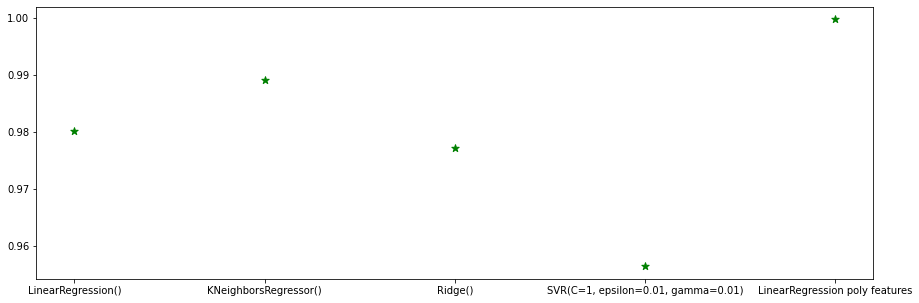

In [19]:
x=Model_Name
y=Model_accu
plt.figure(figsize=(15, 5))
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=60)
plt.show()

In [20]:
'''ENSAMBLED MODELS'''
Model_Name=[]
Model_accu=[]

In [21]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

r2_score: 0.9938414181365597
MSE :  0.00010223748345364274
MAE :  0.0022833864702534123
RMSE :  0.010111255285751752


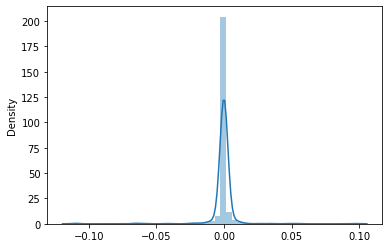

In [22]:
predict(BaggingRegressor(tree.DecisionTreeRegressor(random_state=1)))

r2_score: 0.9686347174076559
MSE :  0.0005206892806101756
MAE :  0.018614253663083294
RMSE :  0.022818616974088844


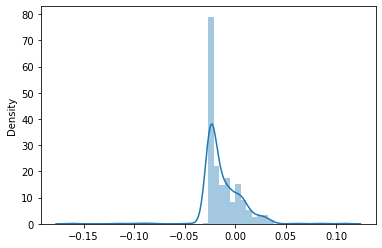

In [23]:
predict(AdaBoostRegressor())

r2_score: 0.9953171184082096
MSE :  7.77396549842384e-05
MAE :  0.002624397266678248
RMSE :  0.008817009412733912


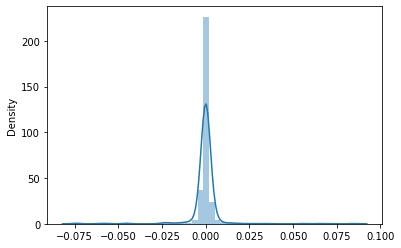

In [24]:
predict(GradientBoostingRegressor())

[10:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score: 0.9947151276114037
MSE :  8.773319334946671e-05
MAE :  0.0028084923054336377
RMSE :  0.009366599881999161


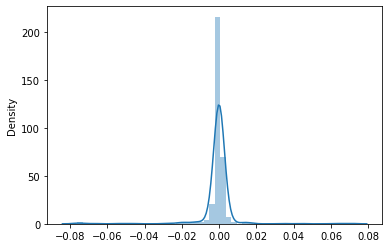

In [25]:
predict(xgb.XGBRegressor())

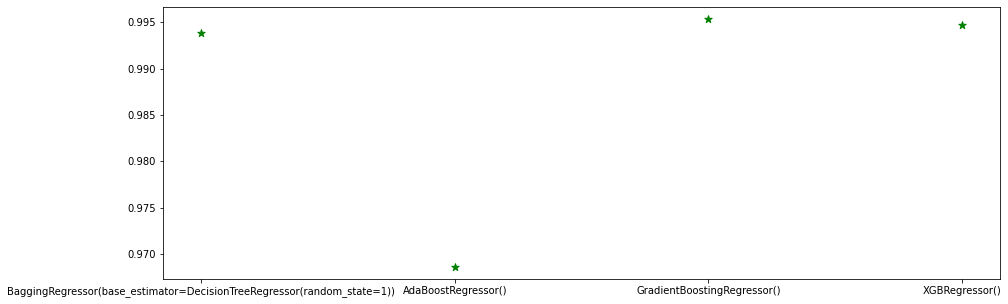

In [26]:
x=Model_Name
y=Model_accu
plt.figure(figsize=(15, 5))
plt.scatter(x, y, label= "stars", color= "green",marker= "*", s=60)
plt.show()